In [1]:
%load_ext autoreload
%load_ext notexbook
%autoreload 2
%load_ext autotime

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import sys
sys.path.append("..")
from tqdm import tqdm
import networkx as nx

plt.style.use("../config/custom_plt.mplstyle")

from generate_incomplete_graph import *
from compute_precision_vs_missing_links import *

time: 1.93 s (started: 2024-03-21 16:03:27 +01:00)


In [2]:
import random
from scipy import spatial, stats, special

def get_cosine_similarities(g, feature_dict):
    cos_sim = []
    cos_sim_shuffle_features = []
    cos_sim_shuffle_nodes = []
    
    feature_dict_values = list(feature_dict.values())
    random.shuffle(feature_dict_values)
    feature_dict_shuffled = {}
    for i, j in enumerate(feature_dict.keys()):
        feature_dict_shuffled[j] = feature_dict_values[i]
    
    for source, target in tqdm(g.edges()):
        f1 = feature_dict[source]
        f2 = feature_dict[target]
        cos_sim.append(1 - spatial.distance.cosine(f1, f2))

        f1 = feature_dict_shuffled[source]
        f2 = feature_dict_shuffled[target]
        cos_sim_shuffle_nodes.append(1 - spatial.distance.cosine(f1, f2))
        
        # Average over 10 random realizations for a given edge
        tmp_cs = []
        for _ in range(10):
            f1_shuffled = np.random.permutation(f1)
            f2_shuffled = np.random.permutation(f2)        
            tmp_cs.append(1 - spatial.distance.cosine(f1_shuffled, f2_shuffled))
        cos_sim_shuffle_features.append(np.mean(tmp_cs))
                

    return cos_sim, cos_sim_shuffle_features, cos_sim_shuffle_nodes

time: 1.71 ms (started: 2024-03-21 16:03:29 +01:00)


In [3]:
citeseer_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer_GC_fixed.edge", nodetype=str)
citeseer_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/citeseer/citeseer.content", header=None, sep="\s+", low_memory=False)

citeseer_features_dict = {} # key = index, value = vector of features
for idx, row in citeseer_features.iterrows():
    citeseer_features_dict[row[0]] = row[1:-1].values

time: 33.1 s (started: 2024-03-21 16:03:29 +01:00)


In [4]:
cora_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora_GC.edge", nodetype=str)
cora_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/cora/cora.content", header=None, sep="\s+", low_memory=False)

cora_features_dict = {} # key = index, value = vector of features
for idx, row in cora_features.iterrows():
    cora_features_dict[str(row[0])] = row[1:-1].values

time: 622 ms (started: 2024-03-21 16:04:02 +01:00)


In [5]:
dblp_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_pprefp/eS1/dblp_pprefp_GC.edge")
dblp_features = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/dblp/dblp_feature.txt", dtype=int)

dblp_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(dblp_features):
    dblp_features_dict[str(i)] = row

time: 17.6 s (started: 2024-03-21 16:04:03 +01:00)


In [6]:
imdb_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_mam/eS1/imdb_mam_GC.edge")
imdb_features = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/imdb/imdb_feature.txt", dtype=int)

imdb_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(imdb_features):
    imdb_features_dict[str(i)] = row

time: 3.96 s (started: 2024-03-21 16:04:20 +01:00)


In [7]:
amazon_photo_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_GC.edge")
amazon_photo_features = np.loadtxt("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/amazon_photo/amazon_photo_features.txt")

amazon_photo_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(amazon_photo_features):
    amazon_photo_features_dict[str(i)] = row

time: 2.94 s (started: 2024-03-21 16:04:24 +01:00)


In [8]:
cornell_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_graph_edges.edge")
cornell_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/cornell/out1_node_feature_label.txt", sep="\s+")
cornell_features = np.array([[float(y) for y in x.split(',')] for x in cornell_features['feature']])

cornell_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(cornell_features):
    cornell_features_dict[str(i)] = row
    

time: 106 ms (started: 2024-03-21 16:04:27 +01:00)


In [9]:
wisconsin_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_graph_edges.edge")
wisconsin_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/wisconsin/out1_node_feature_label.txt", sep="\s+")
wisconsin_features = np.array([[float(y) for y in x.split(',')] for x in wisconsin_features['feature']])

wisconsin_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(wisconsin_features):
    wisconsin_features_dict[str(i)] = row

time: 135 ms (started: 2024-03-21 16:04:27 +01:00)


In [10]:
texas_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_graph_edges.edge")
texas_features = pd.read_csv("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/webkb/texas/out1_node_feature_label.txt", sep="\s+")
texas_features = np.array([[float(y) for y in x.split(',')] for x in texas_features['feature']])

texas_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(texas_features):
    texas_features_dict[str(i)] = row
    

time: 89 ms (started: 2024-03-21 16:04:27 +01:00)


In [11]:
import json

lastfm_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_edges/eS1/lastfm_asia_edges.edge")

p = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/lastfm_asia/lastfm_asia_features.json"

with open(p) as json_data:
    labels = json.load(json_data)

all_features = []
for idx, feature_idx in tqdm(labels.items()):
    features = np.zeros(7842).astype(int)
    features[feature_idx] = 1
    all_features.append(features)
    
lastfm_features = np.array(all_features)

lastfm_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(lastfm_features):
    lastfm_features_dict[str(i)] = row
    

100%|██████████| 7624/7624 [00:00<00:00, 11320.45it/s]


time: 9.93 s (started: 2024-03-21 16:04:28 +01:00)


In [12]:
twitch_ptbr_graph = nx.read_edgelist("/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_edges.edge")

p = "/home/rob/MEGAsync/datasets/networks/machine_learning_datasets/f_mercator/twitch/PTBR/musae_PTBR_features.json"

with open(p) as json_data:
    labels = json.load(json_data)

all_features = []
for idx, feature_idx in labels.items():
    features = np.zeros(3170).astype(int)
    features[feature_idx] = 1
    all_features.append(features)   
    
twitch_ptbr_features = np.array(all_features)

twitch_ptbr_features_dict = {} # key = index, value = vector of features
for i, row in enumerate(twitch_ptbr_features):
    twitch_ptbr_features_dict[str(i)] = row

time: 296 ms (started: 2024-03-21 16:04:38 +01:00)


In [13]:
df = {
    'Citeseer': get_cosine_similarities(citeseer_graph, citeseer_features_dict),
    'Cora': get_cosine_similarities(cora_graph, cora_features_dict),
    'DBLP': get_cosine_similarities(dblp_graph, dblp_features_dict),
    'IMDB': get_cosine_similarities(imdb_graph, imdb_features_dict),
    'Amazon Photo': get_cosine_similarities(amazon_photo_graph, amazon_photo_features_dict),
    'Cornell': get_cosine_similarities(cornell_graph, cornell_features_dict),
    'Wisconsin': get_cosine_similarities(wisconsin_graph, wisconsin_features_dict),
    'Texas': get_cosine_similarities(texas_graph, texas_features_dict),
    'LastFM': get_cosine_similarities(lastfm_graph, lastfm_features_dict),
    'Twitch PTBR': get_cosine_similarities(twitch_ptbr_graph, twitch_ptbr_features_dict)
}

  0%|          | 52/27806 [00:00<01:47, 259.35it/s]/home/rob/.local/lib/python3.10/site-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 31299/31299 [00:52<00:00, 593.81it/s]

time: 6min 56s (started: 2024-03-21 16:04:38 +01:00)


In [14]:
data = pd.DataFrame(df).T.reset_index().sort_values(0)
data.columns = ['dataset', 'cos_sim', 'cos_sim_shuffle_features', 'cos_sim_shuffle_nodes']
data['ks_shuffle_features'] = [stats.ks_2samp(a, b).statistic for a, b in zip(data['cos_sim'], data['cos_sim_shuffle_features'])]
data['ks_shuffle_nodes'] = [stats.ks_2samp(a, b).statistic for a, b in zip(data['cos_sim'], data['cos_sim_shuffle_nodes'])]
data

,dataset,cos_sim,cos_sim_shuffle_features,cos_sim_shuffle_nodes,ks_shuffle_features,ks_shuffle_nodes
1,Cora,"[0.09128709291752768, 0.050000000000000044, 0....","[0.013245323570650436, 0.0, 0.0136082763487954...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1443375672974...",0.889722,0.471493
0,Citeseer,"[0.09240616554505465, 0.19878664198647267, 0.0...","[0.011322770341445965, 0.006933752452815356, 0...","[0.03774256780481988, 0.0, 0.0, 0.0, 0.0, 0.03...",0.968648,0.602781
3,IMDB,"[0.12561485860426558, 0.08968970586617497, 0.0...","[0.04247467423094013, 0.03709973440909624, 0.0...","[0.06706527510148441, 0.03372703128099663, 0.0...",0.395592,0.075252
2,DBLP,"[0.18002057495577395, 0.22956556456066257, 0.1...","[0.021726204731337028, 0.02541278053393865, 0....","[0.0, 0.033883707378584815, 0.0, 0.0, 0.021926...",0.716168,0.386309
8,LastFM,"[0.21786612829592145, 0.22648137748155817, 0.1...","[0.025700199620866192, 0.01697141134025948, 0....","[0.0461285634220675, 0.07778563530952265, 0.01...",0.890635,0.522333
7,Texas,"[0.33176911384606855, 0.39310792944052475, 0.4...","[0.06857150610158275, 0.049088069367381595, 0....","[0.28872213095403265, 0.2945284162042896, 0.30...",0.989831,0.237288
4,Amazon Photo,"[0.3469588019183367, 0.36649409432763036, 0.37...","[0.4132410420102934, 0.5585777147757588, 0.239...","[0.4240042262141921, 0.5670963291623171, 0.258...",0.414573,0.315231
9,Twitch PTBR,"[0.4177863742936747, 0.0, 0.35300904324873117,...","[0.00505721737424174, 0.00505721737424174, 0.0...","[0.4045773899393389, 0.2528608687120868, 0.129...",0.937186,0.036806
6,Wisconsin,"[0.4228827109661053, 0.410549061519928, 0.5124...","[0.03230478691904609, 0.01807015805810499, 0.0...","[0.430730492253948, 0.5421047417431508, 0.2315...",0.984979,0.201717
5,Cornell,"[0.434858108536623, 0.2532922144821772, 0.4049...","[0.0431555685952021, 0.036544084137792865, 0.0...","[0.34802877899356544, 0.36544084137792887, 0.2...",0.989286,0.103571


time: 285 ms (started: 2024-03-21 16:11:34 +01:00)


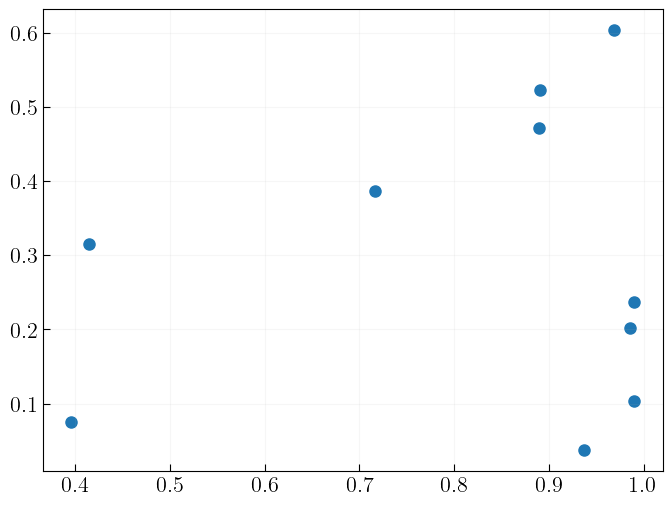

time: 366 ms (started: 2024-03-21 16:11:35 +01:00)


In [15]:
plt.scatter(data['ks_shuffle_features'], data['ks_shuffle_nodes'])

In [16]:
COLORS = ['#F7B32B', '#21A179', '#8E7DBE']

def plot_histograms(data, dataset, ax, with_legend=False):
    data_for_dataset = data[data['dataset'] == dataset]
    a = data_for_dataset['cos_sim'].values[0]
    b = data_for_dataset['cos_sim_shuffle_nodes'].values[0]
    c = data_for_dataset['cos_sim_shuffle_features'].values[0]

    ax.hist(a, bins=30, alpha=0.3, linewidth=2, edgecolor=COLORS [0], fill=True, facecolor=COLORS[0], histtype='step', label='Original')
    ax.hist(b, bins=30, alpha=0.3, linewidth=2, edgecolor=COLORS[1], fill=True, facecolor=COLORS[1], histtype='step', label='Shuffle Nodes')
    ax.hist(c, bins=30, alpha=0.3, linewidth=2, edgecolor=COLORS[2], fill=True, facecolor=COLORS[2], histtype='step', label='Shuffle Features')
    
    
    ax.text(0.5, 0.1, r'KS$_f$ = {:.2f}'.format(data_for_dataset['ks_shuffle_features'].values[0]), 
            fontsize=20, transform=ax.transAxes)
    ax.text(0.5, 0.25, r'KS$_n$ = {:.2f}'.format(data_for_dataset['ks_shuffle_nodes'].values[0]), 
            fontsize=20, transform=ax.transAxes)
    ax.text(0.5, 0.40, r'$\overline{\mathrm{CS}}$ = ' + str(round(np.mean(a), 2)),
            fontsize=20, transform=ax.transAxes)
    
    if with_legend:
        ax.legend()
        
    ax.set_title(rf'\textbf{{{dataset}}}')

time: 2.04 ms (started: 2024-03-21 16:11:35 +01:00)


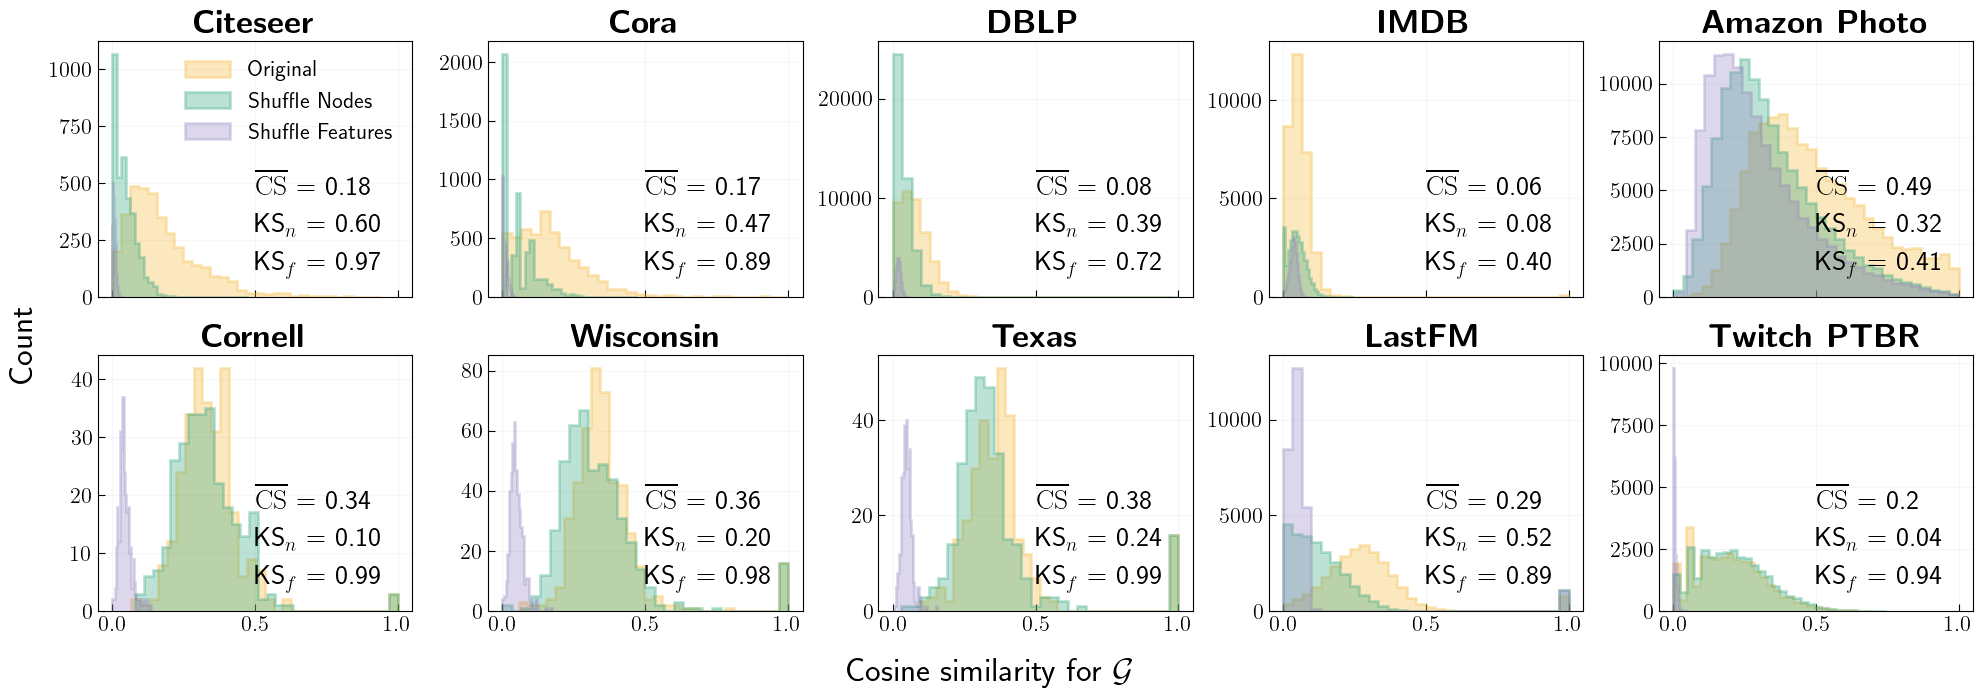

time: 5.81 s (started: 2024-03-21 17:20:26 +01:00)


In [27]:
fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 7))

plt.subplot(2, 5, 1)
plot_histograms(data, 'Citeseer', axs[0, 0], True)

plt.subplot(2, 5, 2)
plot_histograms(data, 'Cora', axs[0, 1])

plt.subplot(2, 5, 3)
plot_histograms(data, 'DBLP', axs[0, 2])

plt.subplot(2, 5, 4)
plot_histograms(data, 'IMDB', axs[0, 3])

plt.subplot(2, 5, 5)
plot_histograms(data, 'Amazon Photo', axs[0, 4])

plt.subplot(2, 5, 6)
plot_histograms(data, 'Cornell', axs[1, 0])

plt.subplot(2, 5, 7)
plot_histograms(data, 'Wisconsin', axs[1, 1])

plt.subplot(2, 5, 8)
plot_histograms(data, 'Texas', axs[1, 2])

plt.subplot(2, 5, 9)
plot_histograms(data, 'LastFM', axs[1, 3])

plt.subplot(2, 5, 10)
plot_histograms(data, 'Twitch PTBR', axs[1, 4])

fig.supxlabel(r'Cosine similarity for $\mathcal{G}$', fontsize=24)
fig.supylabel('Count', fontsize=24, x=0.01)

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/for-response-to-referees-18-03-24/plots/cosine_similarity.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/ReSubmission_npjC/Paper/SI/plots/correlation_cosine_similarity_original_graph.pdf")


> K-S should be a high value (Max =1.0) when the fit is good and a low value (Min = 0.0) when the fit is not good. When the K-S value goes below 0.05, you will be informed that the Lack of fit is significant.

In [18]:
def get_complementary_graph(g):
    # Get non-link graph with the same number of edges as the original graph    
    E_original = nx.number_of_edges(g)
    
    g_complementary = g.__class__()
    g_complementary.add_nodes_from(g)
    
    
    adjacency_shuffled = list(g.adjacency())
    np.random.shuffle(adjacency_shuffled)
    nodes_shuffled = list(g.nodes())
    np.random.shuffle(nodes_shuffled)
    
    for n, nbrs in adjacency_shuffled:
        for n2 in nodes_shuffled:
            if n2 not in nbrs:
                if n != n2:
                    g_complementary.add_edge(n, n2)
                    
                    if nx.number_of_edges(g_complementary) == E_original:
                        return g_complementary
    return None


def concat_results(list_of_lists):
    output_list = ([], [], [])
    for l in list_of_lists:
        output_list[0].extend(l[0])
        output_list[1].extend(l[1])
        output_list[2].extend(l[2])
    return output_list

time: 1.53 ms (started: 2024-03-21 16:11:40 +01:00)


In [19]:
ntimes = 5 # Sample 5 times the complementary graph

df_complementary = {
    'Citeseer': concat_results([get_cosine_similarities(get_complementary_graph(citeseer_graph), citeseer_features_dict) for _ in range(ntimes)]),
    'Cora': concat_results([get_cosine_similarities(get_complementary_graph(cora_graph), cora_features_dict) for _ in range(ntimes)]),
    'DBLP': concat_results([get_cosine_similarities(get_complementary_graph(dblp_graph), dblp_features_dict) for _ in range(ntimes)]),
    'IMDB': concat_results([get_cosine_similarities(get_complementary_graph(imdb_graph), imdb_features_dict) for _ in range(ntimes)]),
    'Amazon Photo': concat_results([get_cosine_similarities(get_complementary_graph(amazon_photo_graph), amazon_photo_features_dict) for _ in range(ntimes)]),
    'Cornell': concat_results([get_cosine_similarities(get_complementary_graph(cornell_graph), cornell_features_dict) for _ in range(ntimes)]),
    'Wisconsin': concat_results([get_cosine_similarities(get_complementary_graph(wisconsin_graph), wisconsin_features_dict) for _ in range(ntimes)]),
    'Texas': concat_results([get_cosine_similarities(get_complementary_graph(texas_graph), texas_features_dict) for _ in range(ntimes)]),
    'LastFM': concat_results([get_cosine_similarities(get_complementary_graph(lastfm_graph), lastfm_features_dict) for _ in range(ntimes)]),
    'Twitch PTBR': concat_results([get_cosine_similarities(get_complementary_graph(twitch_ptbr_graph), twitch_ptbr_features_dict) for _ in range(ntimes)])
}

  0%|          | 42/27806 [00:00<01:06, 416.77it/s]/home/rob/.local/lib/python3.10/site-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
100%|██████████| 31299/31299 [00:50<00:00, 614.71it/s]

time: 1h 7min 10s (started: 2024-03-21 16:11:40 +01:00)


In [20]:
data_complementary = pd.DataFrame(df_complementary).T.reset_index().sort_values(0)
data_complementary.columns = ['dataset', 'cos_sim', 'cos_sim_shuffle_features', 'cos_sim_shuffle_nodes']
data_complementary['ks_shuffle_features'] = [stats.ks_2samp(a, b).statistic for a, b in zip(data_complementary['cos_sim'], data_complementary['cos_sim_shuffle_features'])]
data_complementary['ks_shuffle_nodes'] = [stats.ks_2samp(a, b).statistic for a, b in zip(data_complementary['cos_sim'], data_complementary['cos_sim_shuffle_nodes'])]
data_complementary

,dataset,cos_sim,cos_sim_shuffle_features,cos_sim_shuffle_nodes,ks_shuffle_features,ks_shuffle_nodes
1,Cora,"[0.0, 0.15000000000000002, 0.11322770341445954...","[0.0, 0.010540925533894607, 0.0, 0.0, 0.0, 0.0...","[0.11785113019775795, 0.052704627669473036, 0....",0.634090,0.062853
2,DBLP,"[0.022222222222222254, 0.0488823716737844, 0.0...","[0.019822791512600968, 0.009416472308615153, 0...","[0.028318273589429954, 0.0, 0.0276818266179132...",0.405419,0.035040
3,IMDB,"[0.030816677568068274, 0.04460257750875396, 0....","[0.04948856480170921, 0.03465742591835731, 0.0...","[0.06511653263382788, 0.039989337598104635, 0....",0.308684,0.043973
0,Citeseer,"[0.03335186729825346, 0.0636929755298482, 0.0,...","[0.0040000000000000036, 0.007844645405527362, ...","[0.07999999999999996, 0.03922322702763681, 0.0...",0.690622,0.048528
6,Wisconsin,"[0.12998507664415837, 0.1820364109236412, 0.25...","[0.08063985754082045, 0.05944454429259127, 0.0...","[0.3339630463811757, 0.254762332682534, 0.2853...",0.939914,0.069528
9,Twitch PTBR,"[0.13957263155977062, 0.0410304969931109, 0.21...","[0.011111111111111117, 0.012171612389003683, 0...","[0.16666666666666663, 0.24343224778007388, 0.2...",0.952197,0.039413
7,Texas,"[0.2375655483665995, 0.18504840082369, 0.25788...","[0.057367628294356085, 0.05067598598503592, 0....","[0.35513293706029947, 0.2828427124746191, 0.32...",0.982373,0.054915
8,LastFM,"[0.2869521135776225, 0.059609407440638806, 0.1...","[0.042508382084412696, 0.011141720290623125, 0...","[0.07754907542426637, 0.055708601453115514, 0....",0.569136,0.054564
5,Cornell,"[0.2985548879135065, 0.201610952306699, 0.3606...","[0.0474137323515443, 0.05270213802032213, 0.06...","[0.3433408204766999, 0.3137032025019175, 0.329...",0.910000,0.161429
4,Amazon Photo,"[0.34969712427984123, 0.25498133240721954, 0.2...","[0.37460012453622094, 0.35738844509798445, 0.2...","[0.38677641921521855, 0.3657706900789607, 0.21...",0.120822,0.049187


time: 1.18 s (started: 2024-03-21 17:18:51 +01:00)


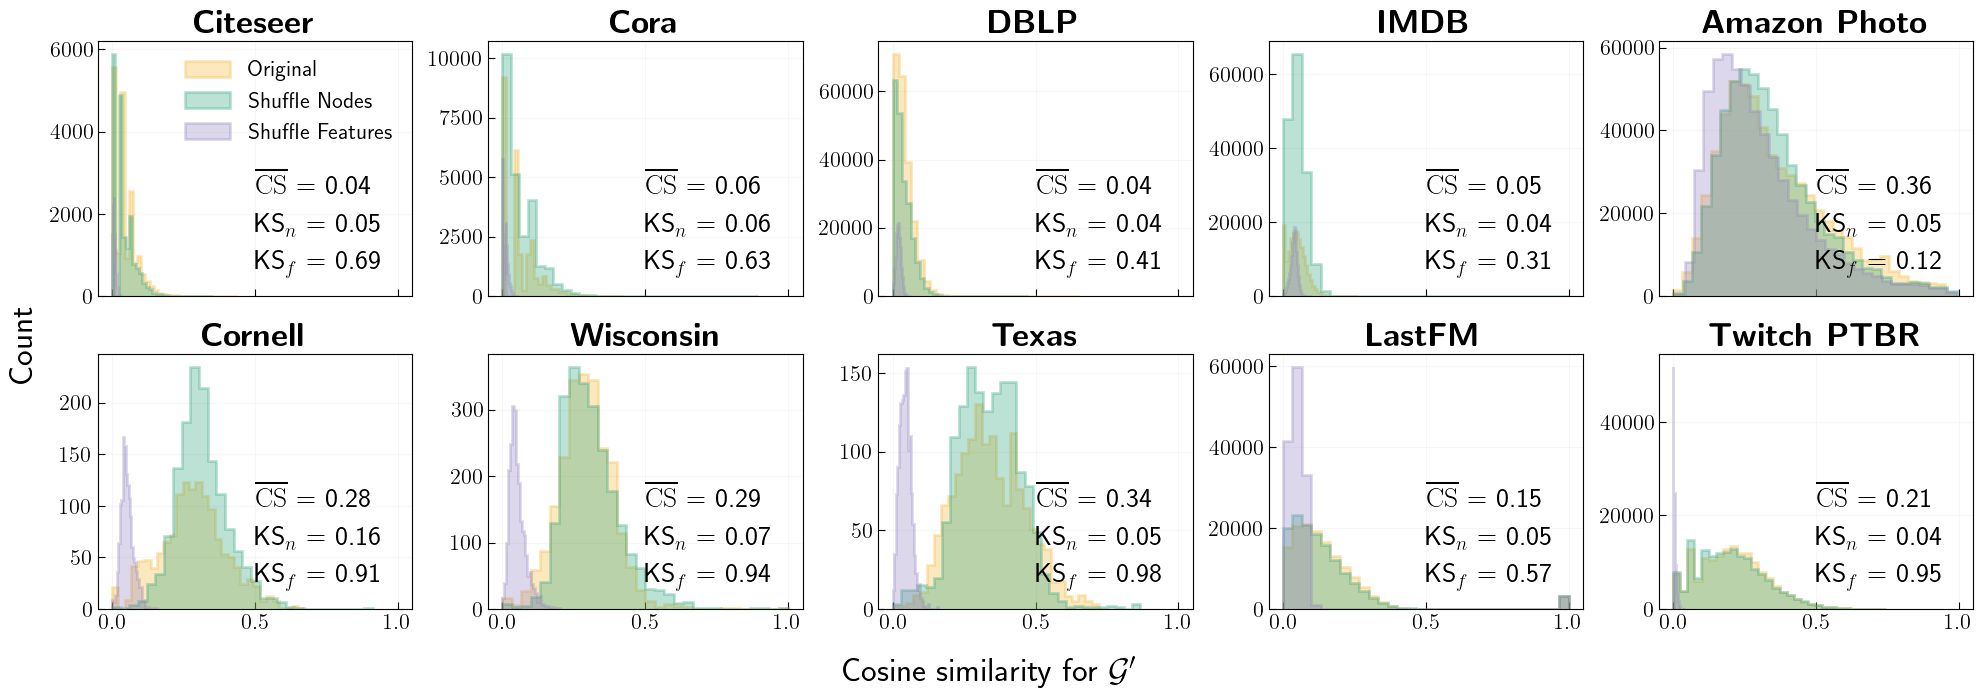

time: 17.1 s (started: 2024-03-21 17:20:09 +01:00)


In [26]:
fig, axs = plt.subplots(2, 5, sharex=True, figsize=(20, 7))

plt.subplot(2, 5, 1)
plot_histograms(data_complementary, 'Citeseer', axs[0, 0], True)

plt.subplot(2, 5, 2)
plot_histograms(data_complementary, 'Cora', axs[0, 1])

plt.subplot(2, 5, 3)
plot_histograms(data_complementary, 'DBLP', axs[0, 2])

plt.subplot(2, 5, 4)
plot_histograms(data_complementary, 'IMDB', axs[0, 3])

plt.subplot(2, 5, 5)
plot_histograms(data_complementary, 'Amazon Photo', axs[0, 4])

plt.subplot(2, 5, 6)
plot_histograms(data_complementary, 'Cornell', axs[1, 0])

plt.subplot(2, 5, 7)
plot_histograms(data_complementary, 'Wisconsin', axs[1, 1])

plt.subplot(2, 5, 8)
plot_histograms(data_complementary, 'Texas', axs[1, 2])

plt.subplot(2, 5, 9)
plot_histograms(data_complementary, 'LastFM', axs[1, 3])

plt.subplot(2, 5, 10)
plot_histograms(data_complementary, 'Twitch PTBR', axs[1, 4])

fig.supxlabel(r'Cosine similarity for $\mathcal{G}^\prime$', fontsize=24)
fig.supylabel('Count', fontsize=24, x=0.01)

plt.tight_layout()

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/Report/for-response-to-referees-18-03-24/plots/cosine_similarity_non_links.pdf")

# plt.savefig("/home/rob/Dropbox/NodesFeaturesEmbeddings/ReSubmission_npjC/Paper/SI/plots/correlation_cosine_similarity_complementary_graph.pdf")



In [22]:
def get_ks_original_complementary_graph(data, data_complementary, dataset):
    data_for_dataset = data[data['dataset'] == dataset]
    data_complementary_for_dataset = data_complementary[data_complementary['dataset'] == dataset]
    
    a = data_for_dataset['cos_sim'].values[0]
    b = data_complementary_for_dataset['cos_sim'].values[0]
    
    return np.mean(a), np.std(a), np.mean(b), np.std(b), (np.mean(a) - np.mean(b)) / np.mean(a)

time: 1.11 ms (started: 2024-03-21 17:19:06 +01:00)


In [23]:
res = {}

for name in data['dataset']:
    val = get_ks_original_complementary_graph(data, data_complementary, name)
    print(f'{name}: {val}')
    res[name] = val
    
res = pd.DataFrame(res).T
res.columns = ['Original Mean' , 'Original Std', 'Complementary Mean', 'Complementary Std', 'Relative Difference']

Cora: (0.16570736574848863, 0.1255528457159111, 0.05804365091354243, 0.058788640697453765, 0.6497219622594125)
Citeseer: (0.17697415703869038, 0.13187775050843575, 0.04195245857639808, 0.0402180154230169, 0.762945848826807)
IMDB: (0.05708594914173633, 0.060356547908607595, 0.04725304926253902, 0.03117675040575155, 0.17224728724022112)
DBLP: (0.07520794213798038, 0.05290541179649624, 0.03714248976484744, 0.03348824561332402, 0.5061360714177777)
LastFM: (0.2850102839311319, 0.15937084064275223, 0.15241622121216652, 0.15523062863279477, 0.4652255381458607)
Texas: (0.38401275364201437, 0.16705833786833027, 0.33964502649916894, 0.12246755061625426, 0.11553711881196023)
Amazon Photo: (0.4876574462718039, 0.2029389629309815, 0.35615177009318116, 0.19073340753243276, 0.2696681393547837)
Twitch PTBR: (0.19717764876562824, 0.12062075702066379, 0.20768452226934284, 0.1175108905572243, -0.05328633123221491)
Wisconsin: (0.3640007152243189, 0.14730166454647653, 0.29079101473760977, 0.095064640865604

In [24]:
print(res.to_latex(float_format="%.3f"))

\begin{tabular}{lrrrrr}
\toprule
{} &  Original Mean &  Original Std &  Complementary Mean &  Complementary Std &  Relative Difference \\
\midrule
Cora         &          0.166 &         0.126 &               0.058 &              0.059 &                0.650 \\
Citeseer     &          0.177 &         0.132 &               0.042 &              0.040 &                0.763 \\
IMDB         &          0.057 &         0.060 &               0.047 &              0.031 &                0.172 \\
DBLP         &          0.075 &         0.053 &               0.037 &              0.033 &                0.506 \\
LastFM       &          0.285 &         0.159 &               0.152 &              0.155 &                0.465 \\
Texas        &          0.384 &         0.167 &               0.340 &              0.122 &                0.116 \\
Amazon Photo &          0.488 &         0.203 &               0.356 &              0.191 &                0.270 \\
Twitch PTBR  &          0.197 &         0.121 & 

/tmp/ipykernel_3579218/3490406322.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(res.to_latex(float_format="%.3f"))


In [28]:
print(res[['Relative Difference']].to_latex(float_format="%.3f"))

\begin{tabular}{lr}
\toprule
{} &  Relative Difference \\
\midrule
Cora         &                0.650 \\
Citeseer     &                0.763 \\
IMDB         &                0.172 \\
DBLP         &                0.506 \\
LastFM       &                0.465 \\
Texas        &                0.116 \\
Amazon Photo &                0.270 \\
Twitch PTBR  &               -0.053 \\
Wisconsin    &                0.201 \\
Cornell      &                0.169 \\
\bottomrule
\end{tabular}

time: 15.9 ms (started: 2024-03-22 10:01:20 +01:00)


/tmp/ipykernel_3579218/3115027209.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(res[['Relative Difference']].to_latex(float_format="%.3f"))


In [25]:
res

,Original Mean,Original Std,Complementary Mean,Complementary Std,Relative Difference
Cora,0.165707,0.125553,0.058044,0.058789,0.649722
Citeseer,0.176974,0.131878,0.041952,0.040218,0.762946
IMDB,0.057086,0.060357,0.047253,0.031177,0.172247
DBLP,0.075208,0.052905,0.037142,0.033488,0.506136
LastFM,0.285010,0.159371,0.152416,0.155231,0.465226
Texas,0.384013,0.167058,0.339645,0.122468,0.115537
Amazon Photo,0.487657,0.202939,0.356152,0.190733,0.269668
Twitch PTBR,0.197178,0.120621,0.207685,0.117511,-0.053286
Wisconsin,0.364001,0.147302,0.290791,0.095065,0.201125
Cornell,0.339307,0.111157,0.282125,0.115930,0.168526


time: 16.4 ms (started: 2024-03-21 17:19:07 +01:00)
